**Task 3:-**

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in the field of machine learning.Task is to build a price prediction model.


In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
!git clone 'https://github.com/dew987/OIBSIP'

fatal: destination path 'OIBSIP' already exists and is not an empty directory.


In [3]:
df= pd.read_csv('/content/OIBSIP/OASIS Project Data/CarPrice_Data.csv')
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Printing the size of the dataset
df.shape

(205, 26)

In [7]:
# Printing all the columns in the dataset
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
df.describe(include= ['int', 'float'])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.describe(include= 'object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [10]:
# Checking for null values in the dataset

df.isnull().sum().to_frame().rename(columns= {0:"Total Null Values"})

,Total Null Values
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [11]:
company= df['CarName'].apply(lambda x:x.split(" ")[0])

df.insert(2,"company",company)

In [12]:
df.drop(['car_ID', 'CarName'], axis= 1, inplace= True)
df.head()

,symboling,company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
# volkswagen
df.loc[(df['company'] == "vw") | (df['company'] == "vokswagen"), 'company'] = 'volkswagen'

# porsche
df.loc[df['company'] == "porcshce", 'company'] = 'porsche'

# toyota
df.loc[df['company'] == "toyouta", 'company'] = 'toyota'

# nissan
df.loc[df['company'] == "Nissan", 'company'] = 'nissan'

# mazda
df.loc[df['company'] == "maxda", 'company'] = 'mazda'

In [15]:
df['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<Axes: ylabel='price'>

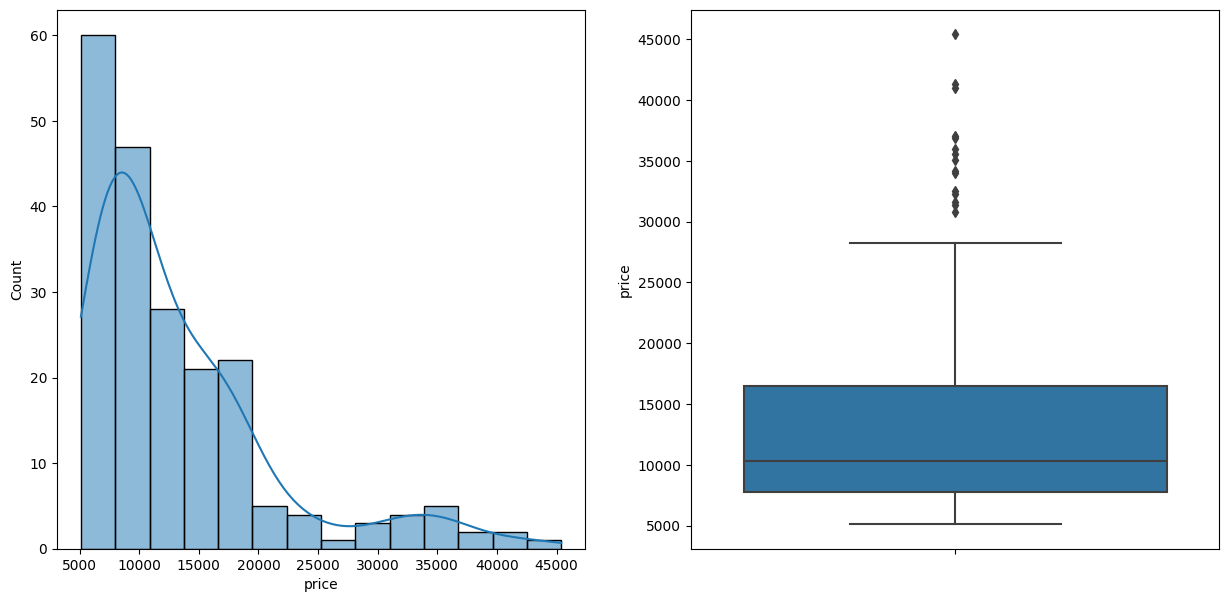

In [16]:

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(df.price,kde=True)

plt.subplot(1,2,2)
sns.boxplot(y=df.price)

In [17]:
df.price.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
price,205.0,13276.710571,7988.852332,5118.0,7788.0,10295.0,16503.0,45400.0


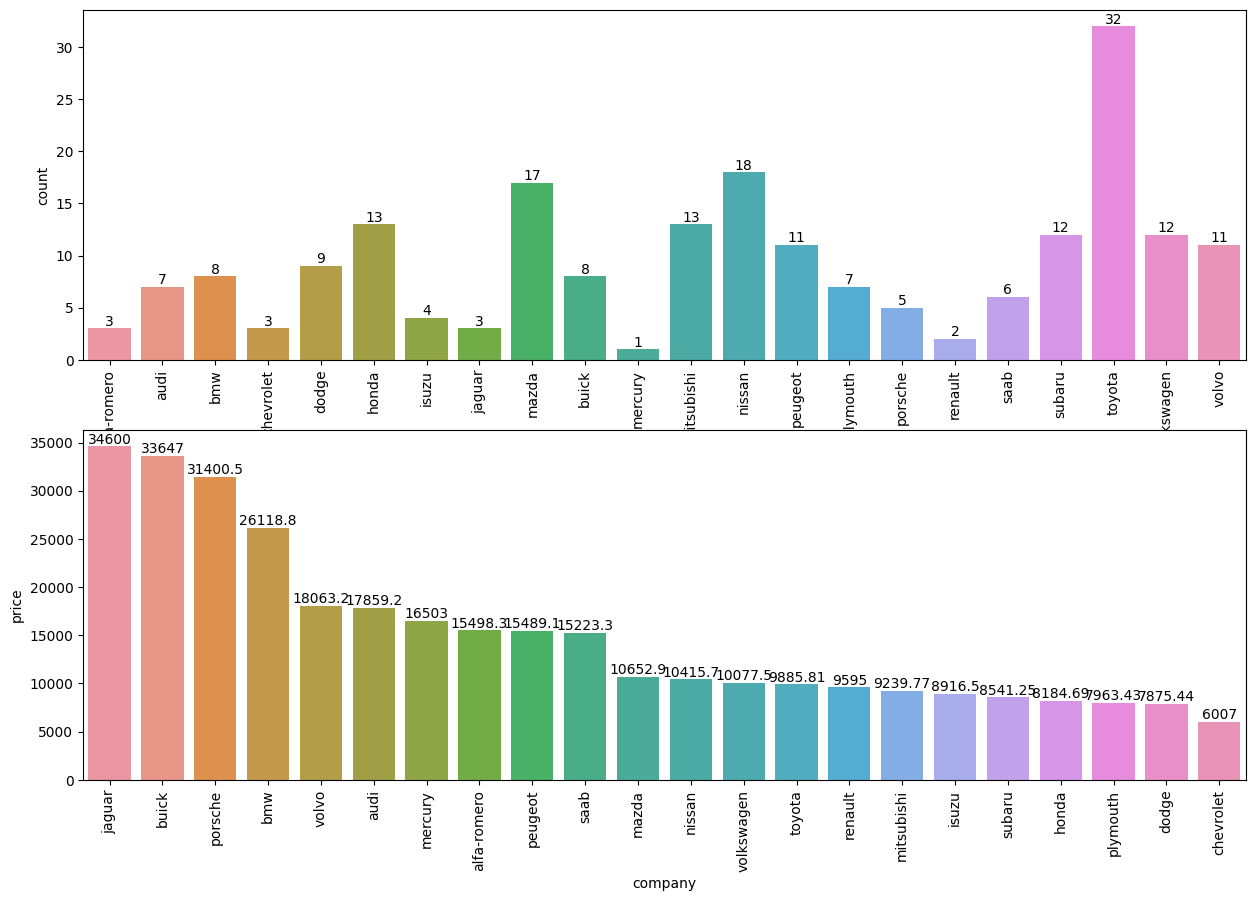

In [18]:

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
ax=sns.countplot(x=df.company)
plt.xticks(rotation=90)
x=ax.bar_label(ax.containers[0]) #stored unwanted labels and text in variables

plt.subplot(2,1,2)
cp=pd.DataFrame(df.groupby('company')['price'].mean().sort_values(ascending=False))
ax=sns.barplot(x=cp.index,y=cp.price)
plt.xticks(rotation=90)
x=ax.bar_label(ax.containers[0])

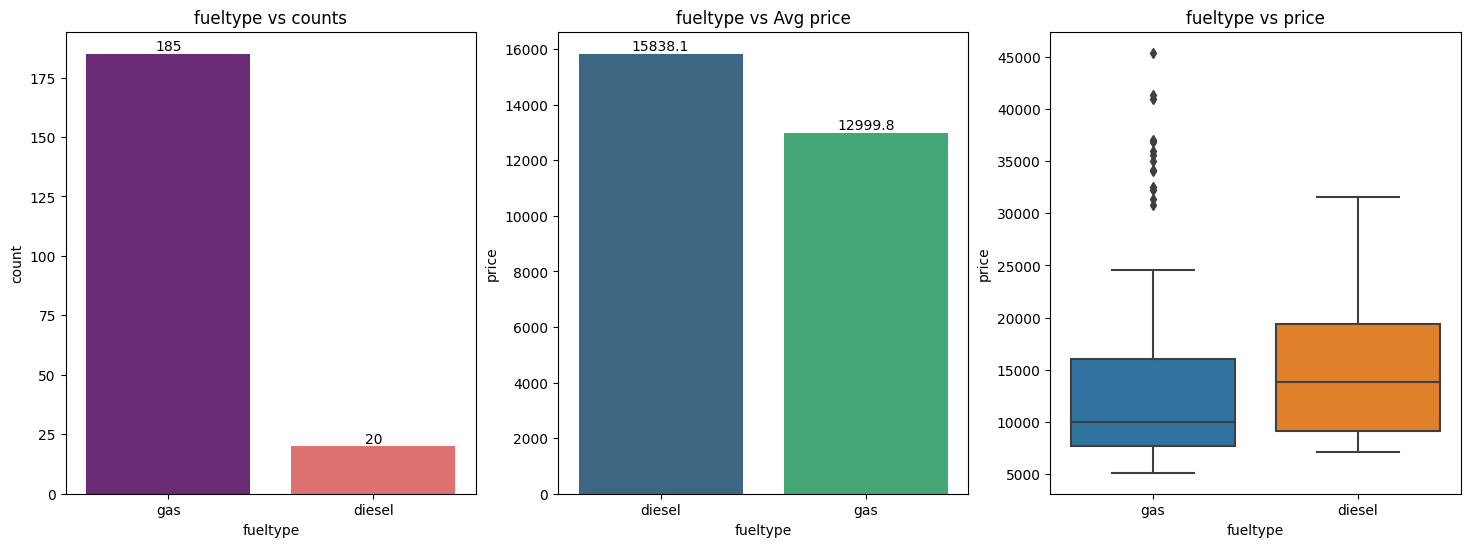

In [19]:
def _plot(col):
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    ax=sns.countplot(x=df[col],palette="magma")
    x=ax.bar_label(ax.containers[0])
    plt.title("{0} vs counts".format(col))
    
    plt.subplot(1,3,2)
    gby=pd.DataFrame(df.groupby(col)['price'].mean().sort_values(ascending=False))
    ax=sns.barplot(x=gby.index,y=gby.price,palette="viridis")
    x=ax.bar_label(ax.containers[0])
    plt.title("{0} vs Avg price".format(col))
    
    plt.subplot(1,3,3)
    sns.boxplot(x=df[col],y=df['price'])
    plt.title("{0} vs price".format(col))
    
_plot('fueltype')

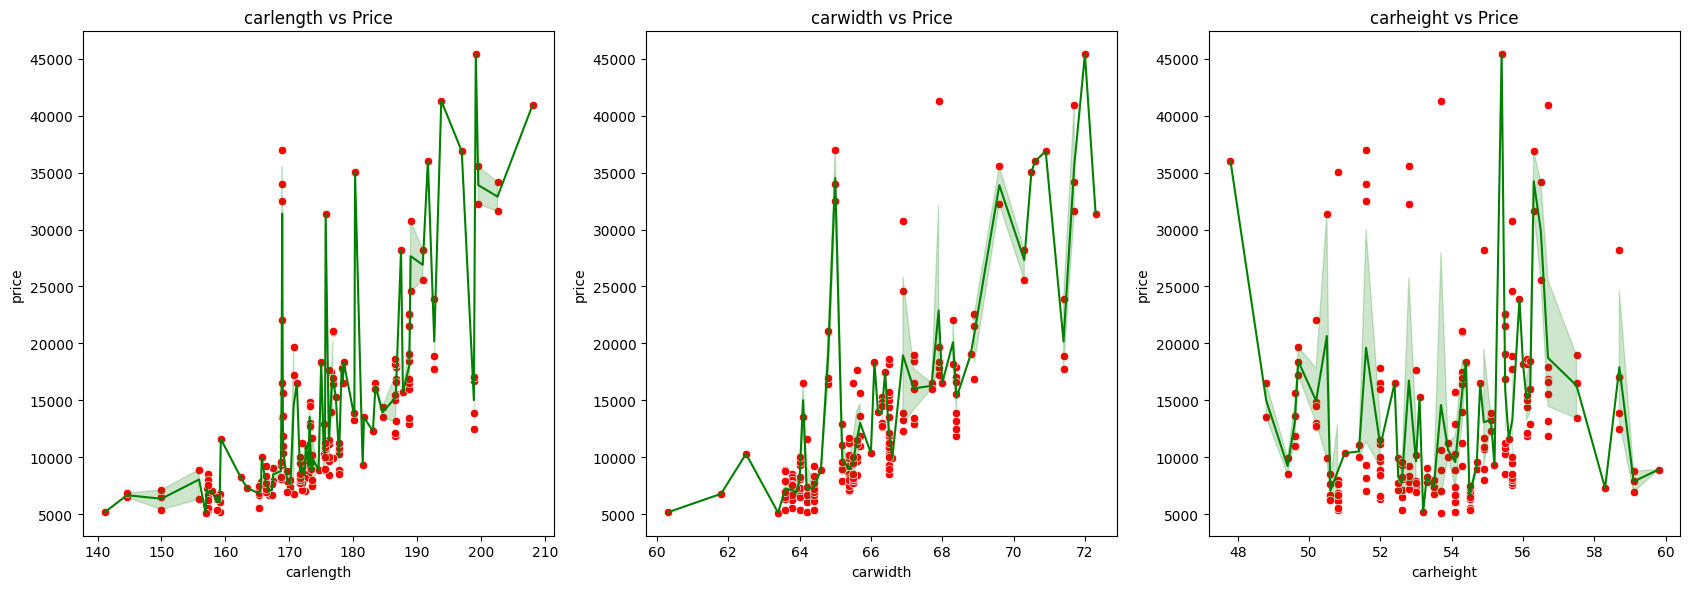

In [20]:
def num_plot(cols):
    c=1
    plt.figure(figsize=(17,6))
    for i in cols:
        plt.subplot(1,3,c)
        sns.scatterplot(x=i,y='price',data=df,color='red')
        sns.lineplot(x=i,y='price',data=df,color='green')
        plt.title("{0} vs Price".format(i))
        plt.tight_layout()
        c=c+1
     

num_plot(['carlength','carwidth', 'carheight'])

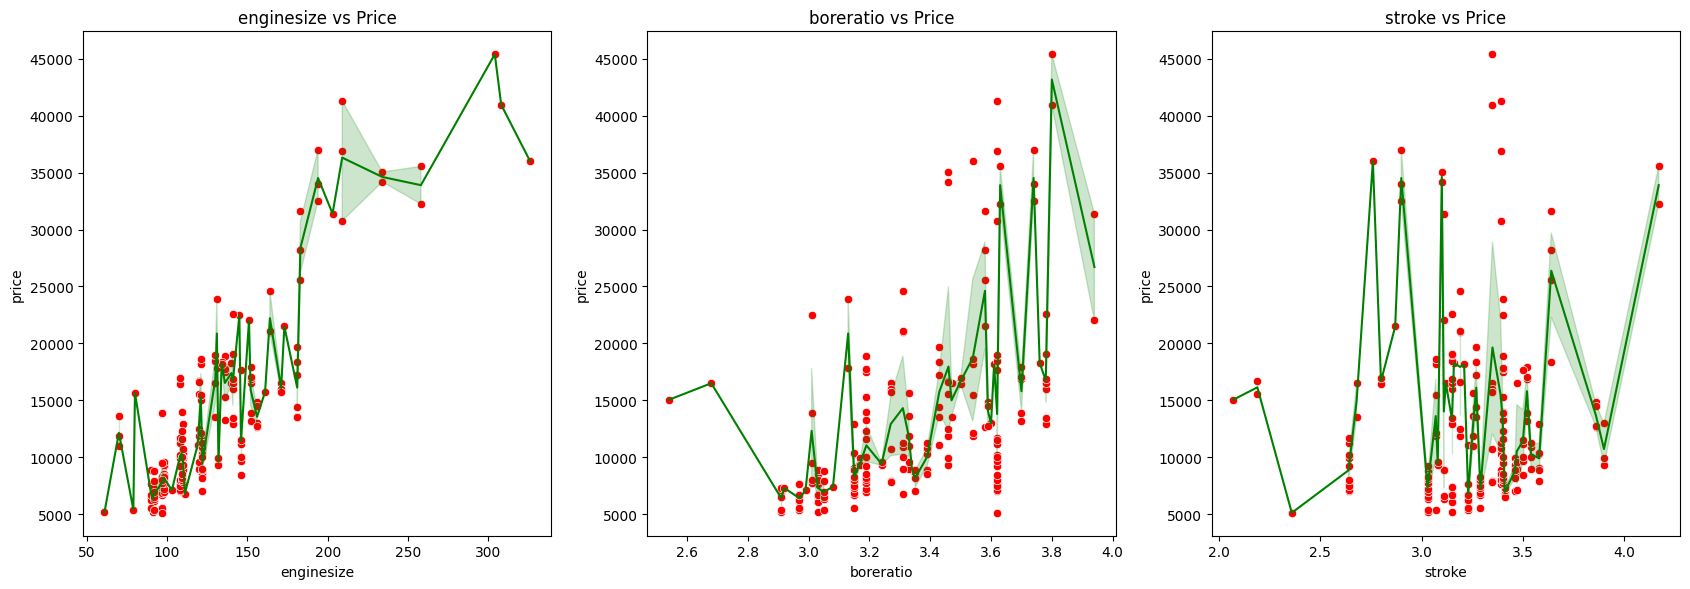

In [21]:
num_plot(['enginesize','boreratio', 'stroke'])

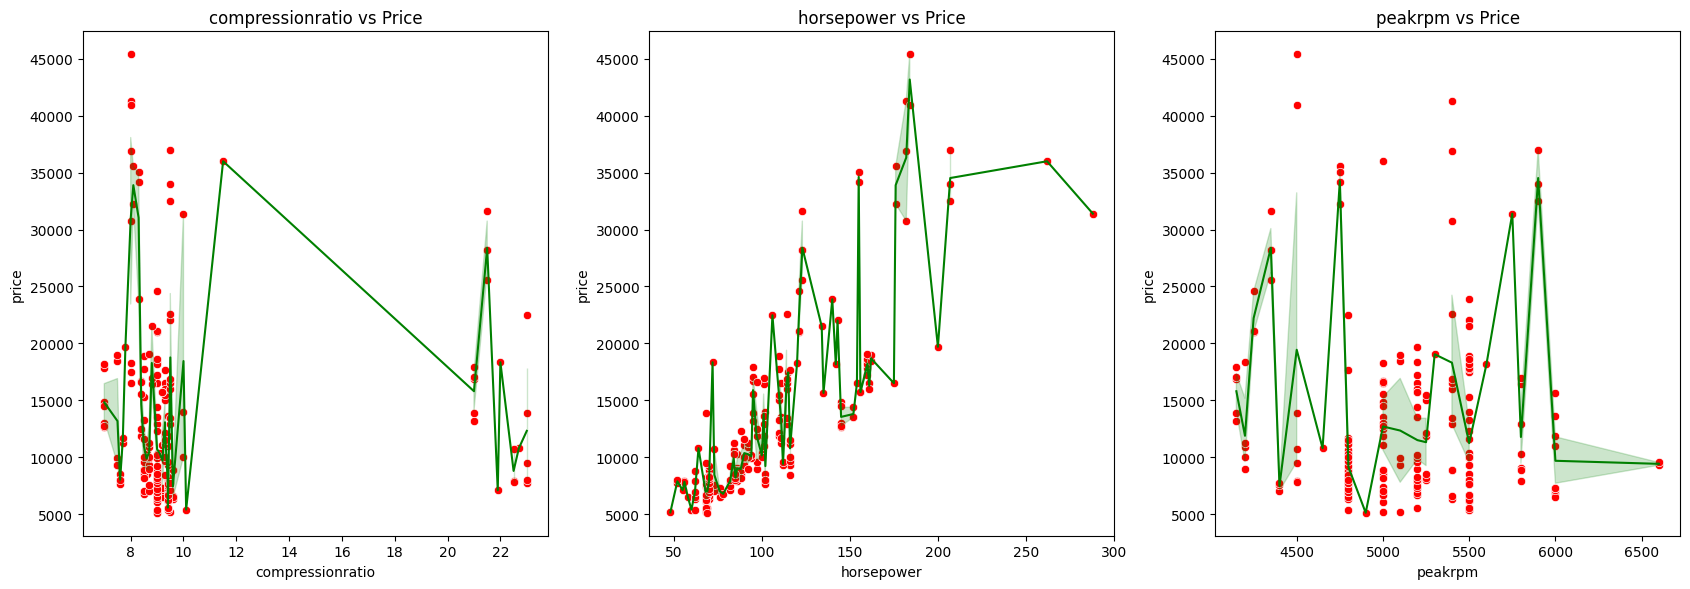

In [22]:
num_plot(['compressionratio','horsepower', 'peakrpm'])

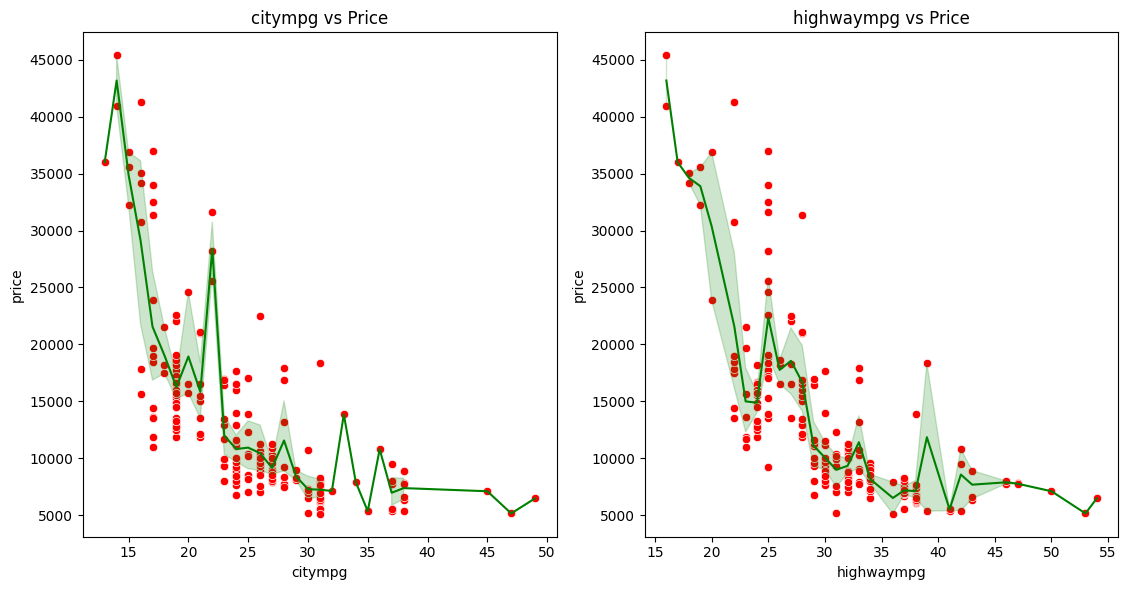

In [23]:
num_plot(['citympg', 'highwaympg'])

<Axes: xlabel='symboling', ylabel='price'>

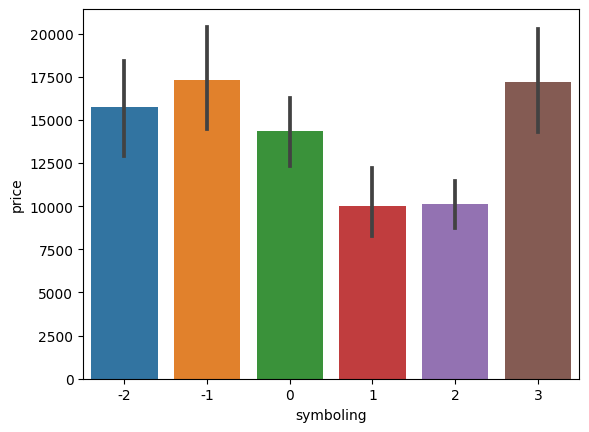

In [24]:
sns.barplot(x=df.symboling,y=df.price)

In [25]:
df_new=df.copy()
     
df_new.drop('symboling',axis=1,inplace=True)
     
df_new=pd.get_dummies(data=df_new,columns=['fueltype', 'aspiration', 'doornumber', 'carbody','drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem'])
     
le=LabelEncoder()
df_new.company= le.fit_transform(df_new.company)
df_new.head()

,company,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
var=VarianceThreshold(threshold=0.1)
var.fit(df_new.select_dtypes(['int','float']))

VarianceThreshold(threshold=0.1)

In [27]:
variance=pd.DataFrame({'columns name':df_new.select_dtypes(['int','float']).columns,
                       'Variance':var.get_support()})
variance

,columns name,Variance
0,company,True
1,wheelbase,True
2,carlength,True
3,carwidth,True
4,carheight,True
5,curbweight,True
6,enginesize,True
7,boreratio,False
8,stroke,False
9,compressionratio,True


<Axes: >

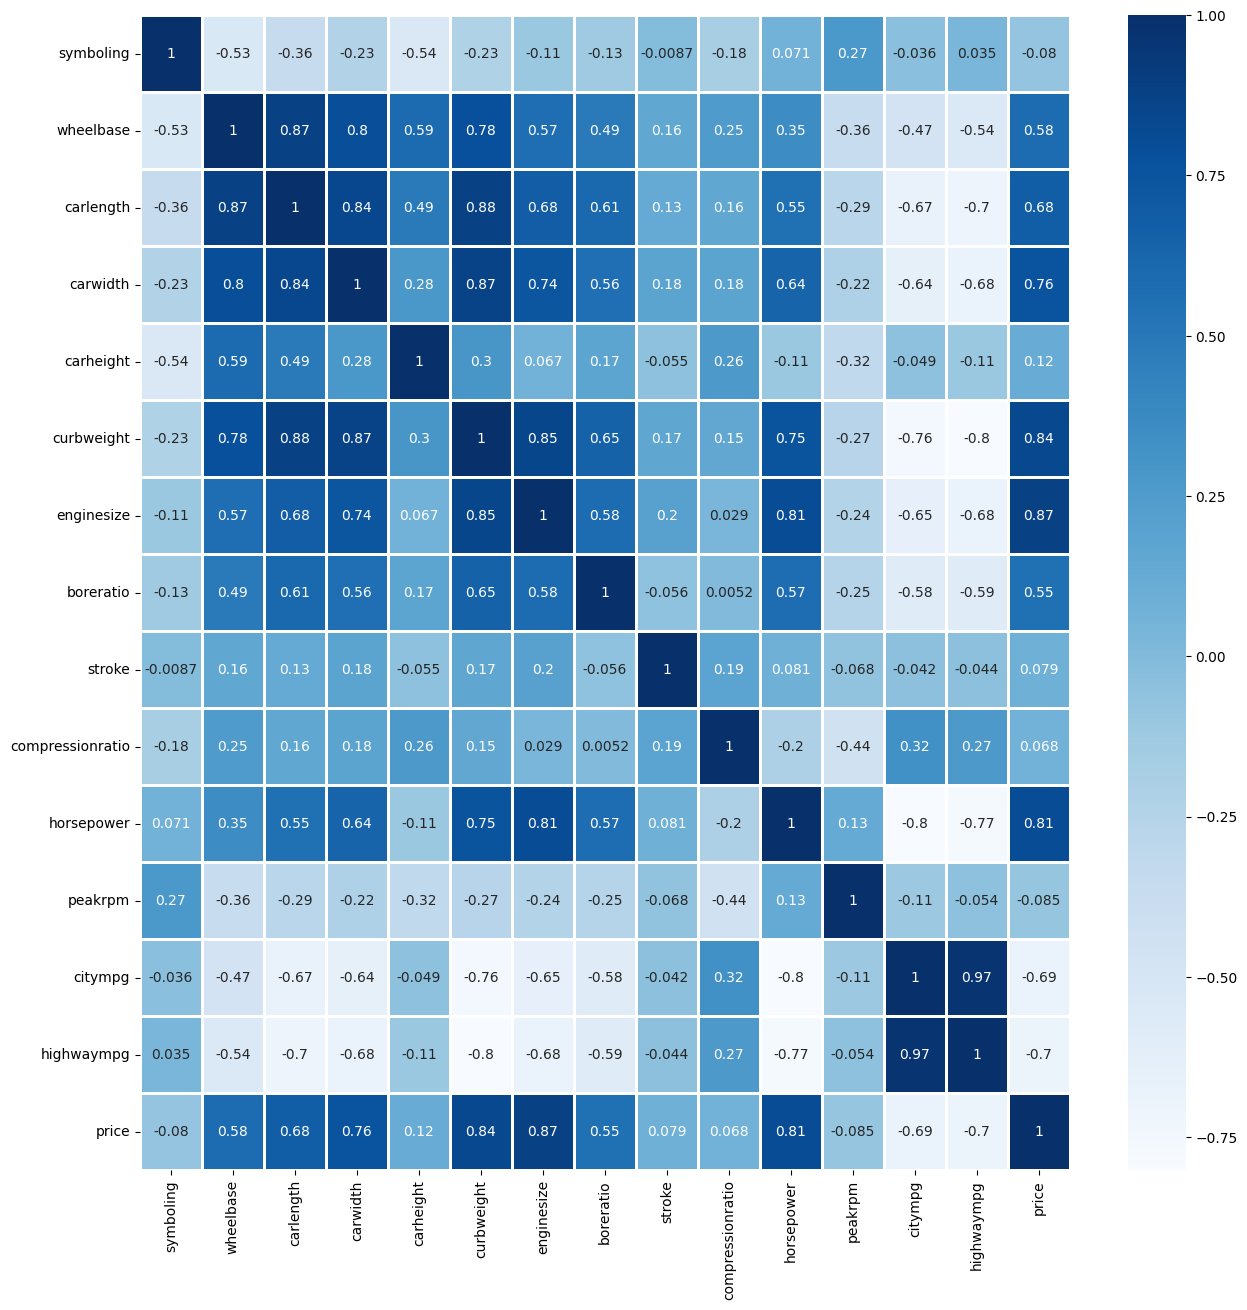

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidth=1,cmap="Blues")

In [29]:
df_new.drop(['carheight','stroke','peakrpm','compressionratio','highwaympg'], axis= 1, inplace= True)

In [30]:
x= df_new.drop('price', axis= 1)
y= df_new.price

In [31]:
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size= 0.7, random_state= 42)


In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 47)
(62, 47)
(143,)
(62,)


In [33]:
scalar= StandardScaler()
x_train_scaled= scalar.fit_transform(x_train)
x_test_scaled= scalar.transform(x_test)

In [34]:
training_score= []
testing_score= []

def run_model(model):
  model.fit(x_train, y_train)
  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)
  a= r2_score(y_train, y_pred_train)
  b= r2_score(y_test, y_pred_test)
  training_score.append(a)
  testing_score.append(b)


In [35]:
lr= LinearRegression()
run_model(lr)


print('Training score= ', training_score)
print('Testing score= ', testing_score)

Training score=  [0.9481344584011939]
Testing score=  [0.8744612153622467]
